KeyError: "['1920s' '1930s' '1940s' '1950s' '1960s' '1970s' '1980s' '1990s' '2000s'\n '2010s'] not in index"

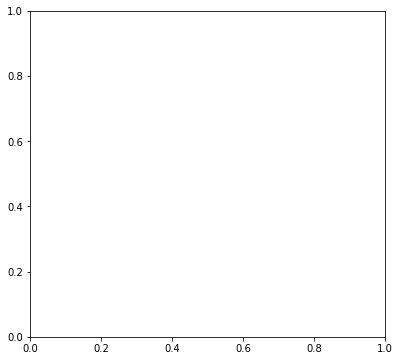

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from data_gen import gen_df

def fig2_J(time_var):
    # Importing data and making new dataframe
    filename = 'imdb.csv'
    df = gen_df(filename)
    imdb = df.copy()

    # Creating variable that takes the average IMDB rating per year
    imdb['avg_rat'] = imdb.groupby(time_var)['imdbRating'].transform(lambda x : x.mean())
    
    # Normalizing the average rating, index 100=1920
    #imdb['avg_rat_index'] = imdb['avg_rat'].transform(lambda x : x/x[0]*100)
    
    # Creating new dataframe which only contain one value (the normalized ratings) per year 
    y = pd.DataFrame(imdb.groupby(time_var)['avg_rat'].first())
    y.reset_index(inplace=True)    
    y['avg_rat_index'] = y['avg_rat']/y['avg_rat'][0]*100
    


    # Plotting the average ratings 
    fig = plt.figure(figsize=(14,6))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1 = x.plot(y[time_var], y['avg_rat'], color='black')
    ax1.set_ylabel('Average rating')
    ax1.set_title(f'Average IMDB rating, 1920-2013')
    ax1.set_ylim([0,10])
    
    # Plotting the normalized average ratings
    ax2 = fig.add_subplot(1,2,2)
    ax2 = x.plot(y[time_var], y['avg_rat_index'], color='black')
    ax2.set_ylabel(f'Index: 1920=100')
    ax2.set_title(f'Normalized average of IMDB rating, 1920-2013')
    ax2.set_ylim([80,105])    
    
fig2_J('decade')

## Gør interaktiv med år eller decade og ret akse til 

In [22]:

# Importing data and making new dataframe
filename = 'imdb.csv'
df = gen_df(filename)
imdb = df.copy()

# Creating variable that takes the average IMDB rating per year
imdb['avg_rat'] = imdb.groupby('decade')['imdbRating'].transform(lambda x : x.mean())

# Normalizing the average rating, index 100=1920
#imdb['avg_rat_index'] = imdb['avg_rat'].transform(lambda x : x/x[0]*100)

# Creating new dataframe which only contain one value (the normalized ratings) per year 
x = pd.DataFrame(imdb.groupby('decade')['avg_rat'].first())
x.reset_index(inplace=True)    
x['avg_rat_index'] = x['avg_rat']/x['avg_rat'][0]*100

x.head(10)


,decade,avg_rat,avg_rat_index
0,1920s,7.555195,100.000000
1,1930s,7.267052,96.186163
2,1940s,7.183401,95.078962
3,1950s,6.961950,92.147851
4,1960s,7.037021,93.141493
5,1970s,6.851720,90.688858
6,1980s,6.701204,88.696637
7,1990s,6.557941,86.800418
8,2000s,6.595162,87.293080
9,2010s,6.602464,87.389719
